In [2]:
from IPython.core.pylabtools import figsize
import numpy as np
from numpy.random import dirichlet
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12.5, 4)

In [5]:
def  expected_revenue(P):
    return 79 * P[:, 0] + 49 * P[:, 1] + 25 * P[:, 2] + 0 * P[:, 3]

2サイトのサンプル作成と事後分布推定

In [6]:
n_a = 1000
n_a_79 = 10
n_a_49 = 46
n_a_25 = 80
n_a_0 = n_a - (n_a_79 + n_a_49 + n_a_25)

observations_a = np.array([n_a_79, n_a_49, n_a_25, n_a_0])

n_b = 2000
n_b_79 = 45
n_b_49 = 84
n_b_25 = 200
n_b_0 = n_b - (n_b_79 + n_b_49 + n_b_25)

observations_b = np.array([n_b_79, n_b_49, n_b_25, n_b_0])

prior_parameters = np.array([1,1,1,1])

posterior_samples_a = dirichlet(prior_parameters + observations_a, 
                              size=10000)
posterior_samples_b = dirichlet(prior_parameters + observations_b, 
                              size=10000)

posterior_expected_revenue_a = expected_revenue(posterior_samples_a)
posterior_expected_revenue_b = expected_revenue(posterior_samples_b)

両サイトの期待値の事後分布を比較

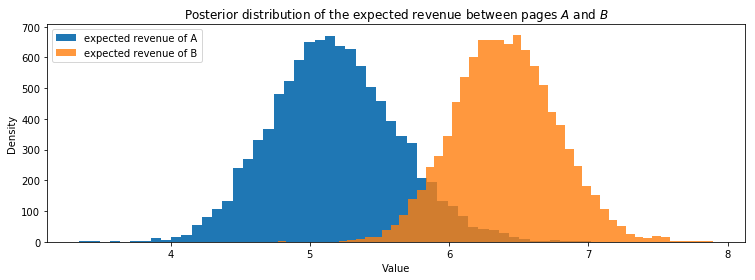

In [16]:
plt.hist(posterior_expected_revenue_a, histtype='stepfilled',
                label='expected revenue of A',
                bins=50)
plt.hist(posterior_expected_revenue_b, histtype='stepfilled',
                label='expected revenue of B',
                bins=50, alpha=0.8)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title("Posterior distribution of the expected revenue "
                "between pages $A$ and $B$")
plt.legend()

In [8]:
p = (posterior_expected_revenue_b > \
        posterior_expected_revenue_a).mean()

print("Probability that page B has "
            "a higher rebenue than page A: %.3f" % p)

Probability that page B has a higher rebenue than page A: 0.983


期待値の差の事後分布

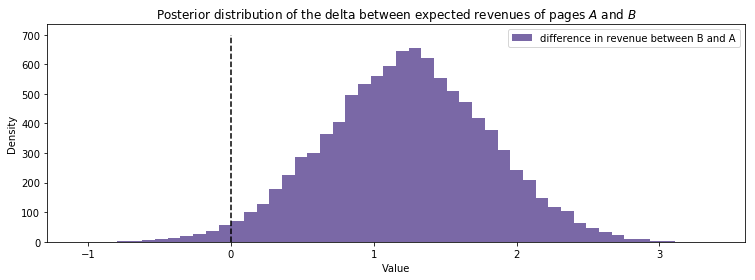

In [15]:
posterior_diff = posterior_expected_revenue_b - \
                            posterior_expected_revenue_a
plt.hist(posterior_diff, histtype='stepfilled',
                color='#7A68A6', bins=50,
                label='difference in revenue between B and A')
plt.vlines(0, 0, 700, linestyles='--')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of the delta "
                 "between expected revenues of pages $A$ and $B$")
plt.legend()
fig_name = "fig6.png"
plt.savefig(fig_name,  bbox_inches='tight')